<a href="https://colab.research.google.com/github/janeckijakub/laba_cv_homeworks/blob/main/Cv_homework1_(sent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

In [3]:
# Helper functions, just execute and ignore
image_link = "https://i.etsystatic.com/16952472/r/il/bf0677/1530154159/il_fullxfull.1530154159_97sx.jpg"


def download_image(image_link: str) -> str:
    # Download the image and save it locally as a .jpg file
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename

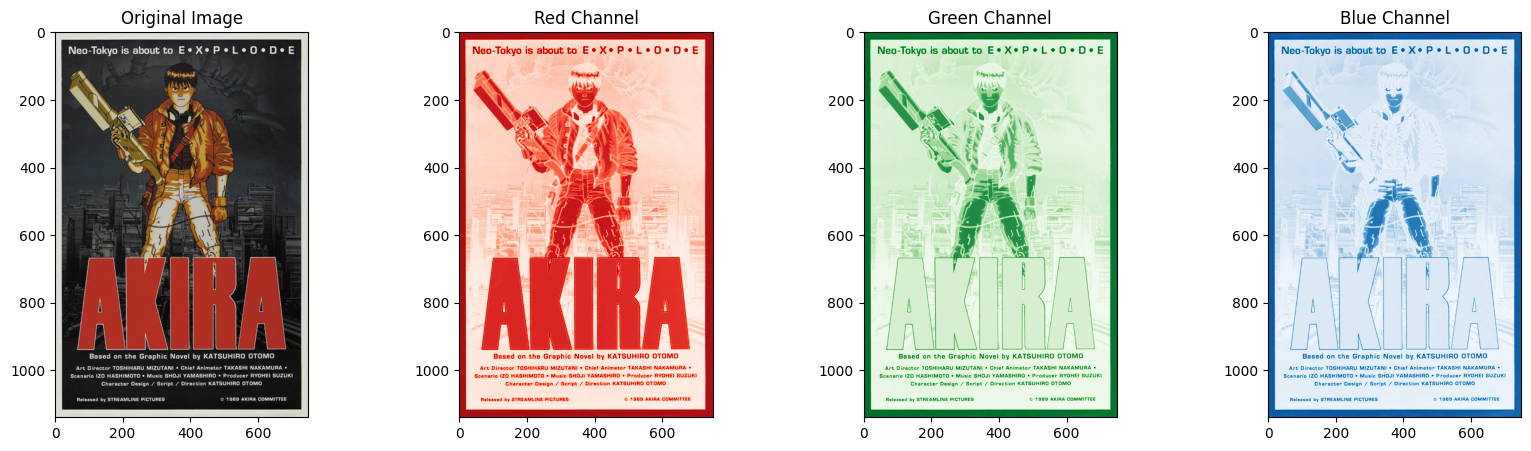

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

def download_image(image_link: str) -> str:

    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename

def exercise_1(image_path: str):


    # Wczytujemy obraz do plt format
    image = plt.imread(image_path)

    # Split the channels
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]

    # Display the original image and its channels
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(142)
    plt.imshow(r, cmap="Reds")
    plt.title("Red Channel")

    plt.subplot(143)
    plt.imshow(g, cmap="Greens")
    plt.title("Green Channel")

    plt.subplot(144)
    plt.imshow(b, cmap="Blues")
    plt.title("Blue Channel")
    plt.show()

def main():

  exercise_1(download_image(image_link))

if __name__ == "__main__":
  main()

In [12]:
import os
import torch
import torchvision.io as tvio

def exercise_2_torch(image_path: str):
    # Wczytaj obraz torchvision
    image = tvio.read_image(image_path)

    # Rozmiar na dysku
    file_size = os.path.getsize(image_path) / 1024

    # Rozmiar w pamięci
    size_in_memory = (image.nelement() * image.element_size()) / 1024

    # Wymiar obrazu
    shape = image.shape


    # Czy cuda
    if torch.cuda.is_available():
      image = image.to('cuda')
    device = image.device


    # Wyświetl informacje
    print(f"Rozmiar pliku na dysku: {file_size:.2f} KB")
    print(f"Rozmiar w pamięci: {size_in_memory:.2f} KB")
    print(f"Wymiary obrazu: {image.shape}")
    print(f"Typ danych: {image.dtype}")
    print(f"Cuda: {device}")

def exercise_2_plt(image_path):
    # Wczytaj obraz
    image = plt.imread(image_path)

    # Rozmiar na dysku
    file_size = os.path.getsize(image_path) / 1024

    # Rozmiar w pamięci
    size_in_memory = image.nbytes / 1024


    # Wyświetl informacje
    print(f"Rozmiar pliku na dysku: {file_size:.2f} KB")
    print(f"Rozmiar w pamięci: {size_in_memory:.2f} KB")
    print(f"Wymiary obrazu: {image.shape}")
    print(f"Typ danych: {image.dtype}")


def main():

  print(f"Exercise2 torch")
  exercise_2_torch(download_image(image_link))
  print(f"\nExercise2 plt")
  exercise_2_plt(download_image(image_link))

if __name__ == "__main__":
  main()


Exercise2 torch
Rozmiar pliku na dysku: 145.50 KB
Rozmiar w pamięci: 2502.69 KB
Wymiary obrazu: torch.Size([3, 1139, 750])
Typ danych: torch.uint8
Cuda: cuda:0

Exercise2 plt
Rozmiar pliku na dysku: 145.50 KB
Rozmiar w pamięci: 2502.69 KB
Wymiary obrazu: (1139, 750, 3)
Typ danych: uint8


0.5001474978050922
0.5064430787240269


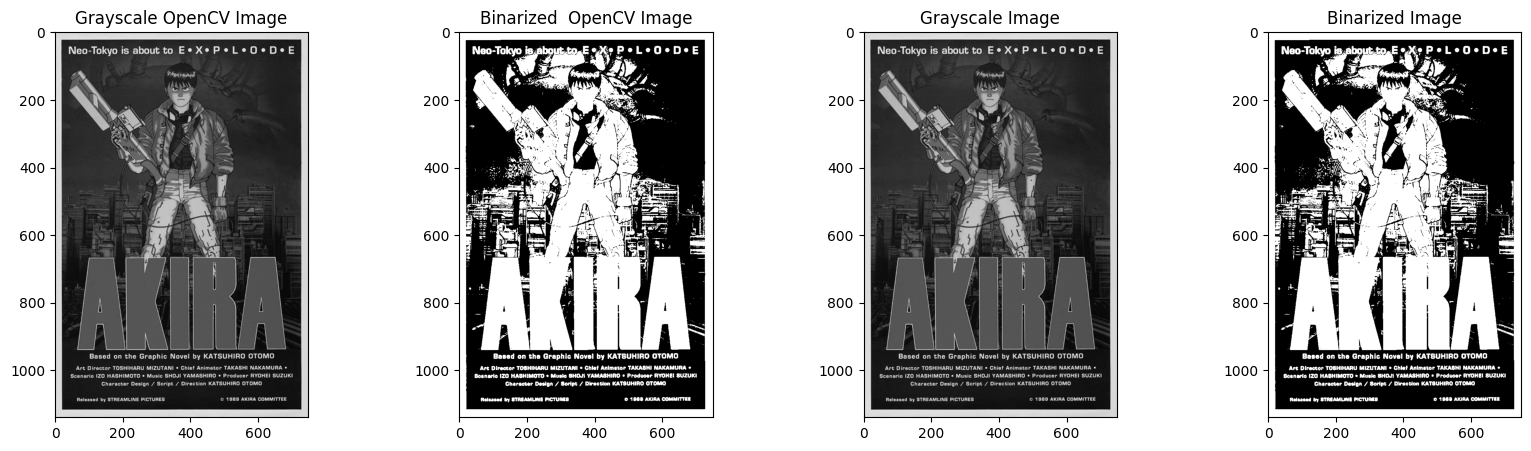

In [56]:
import numpy as np

def exercise_3(image_path):
    # Wczytaj obraz
    image = plt.imread(image_path)


    # Zmień na grayscale z OpenCV (metoda 1)
    img_cv = cv2.imread(image_path)
    gray_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    # Zamień na grayscale (metoda 2)
    grayscale = 0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2]



    # Mediana threshold
    median = np.median(grayscale)
    median_cv = np.median(gray_cv)



    # Tworzymy binarny obraz
    binary = np.where(grayscale >= median, 1.0, 0.0)
    binary_cv = np.where(gray_cv >= median_cv, 1.0, 0.0)
    print(np.mean(binary))
    print(np.mean(binary_cv))

    # Wyświetl obraz
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.imshow(gray_cv, cmap="gray")
    plt.title("Grayscale OpenCV Image")
    plt.subplot(142)
    plt.imshow(binary_cv, cmap="gray")
    plt.title("Binarized  OpenCV Image")


    plt.subplot(143)
    plt.imshow(grayscale, cmap="gray")
    plt.title("Grayscale Image")
    plt.subplot(144)
    plt.imshow(binary, cmap="gray")
    plt.title("Binarized Image")


    plt.show()

def main():

  exercise_3(download_image(image_link))

if __name__ == "__main__":
  main()
